# View HD111980
=============================================================================================

- author : Sylvie Dagoret-Campagne
- date   : November 5th 2017


Analysis of star HD111980 Night 30 May 2017 at CTIO.


- Main purpose : Spectrum in different gratings/holograms 
- Bougher line

In [16]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [17]:
theNotebook="ViewAllImages"

In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ViewAllImages
ccdproc version 1.3.0
bottleneck version 1.2.1
/pbs/throng/lsst/users/dagoret/GitHubatCC/CTIOAnaJun2017/ana_30may17/HD111980


In [19]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [20]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Input

In [21]:
#inputdir="/Users/dagoret/DATA/CTIODataJune2017_reducedRed/data_30may17"
inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reducedRed/data_30may17"
MIN_IMGNUMBER=58
MAX_IMGNUMBER=80  # temporary
#MAX_IMGNUMBER=190
date="20170530"
object_name='HD111980'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=4

# Output

In [22]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

# Read Input file

In [23]:
dirlist_all = [inputdir] # only one directory to process
sorted_numbers,sorted_files = MakeFileList(dirlist_all,MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe) 

all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt,all_filt1,all_filt2=BuildImages(sorted_files,sorted_numbers,object_name)

print 'Number of images:',len(all_images)

Number of images: 23


In [24]:
all_header[0]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD11980 '           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170531.000218' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

## Show images
-----------------------

In [25]:
def ShowRawImages():
    """
    ShowRawImages: Show the raw images without background subtraction
    ==============
    """
    #global all_images
    #global all_titles
    #global object_name

    
    NBIMAGES=len(all_images)
    MAXIMGROW=int(NBIMAGES/NBIMGPERROW)+1

    f, axarr = plt.subplots(MAXIMGROW,NBIMGPERROW,figsize=(20,5*MAXIMGROW))
    for index in np.arange(0,NBIMAGES):
        ix=index%NBIMGPERROW
        iy=index/NBIMGPERROW
        #im=axarr[iy,ix].imshow(all_images[index],origin='lower',cmap='rainbow',norm=LogNorm(vmin=0.1, vmax=10))
        im=axarr[iy,ix].imshow(all_images[index],origin='lower',cmap='jet',vmin=0, vmax=500)
        #axarr[iy,ix].annotate(all_filt[index], xy=(1000., 1500.),fontsize=16,color='yellow')
        axarr[iy,ix].text(1000.,1700,all_filt[index],verticalalignment='bottom', horizontalalignment='center',color='yellow', fontweight='bold',fontsize=16)
        axarr[iy,ix].set_title(all_titles[index])
        axarr[iy,ix].grid(color='white', ls='solid')
    title='Raw images of {}'.format(object_name)
    plt.suptitle(title,size=30)        

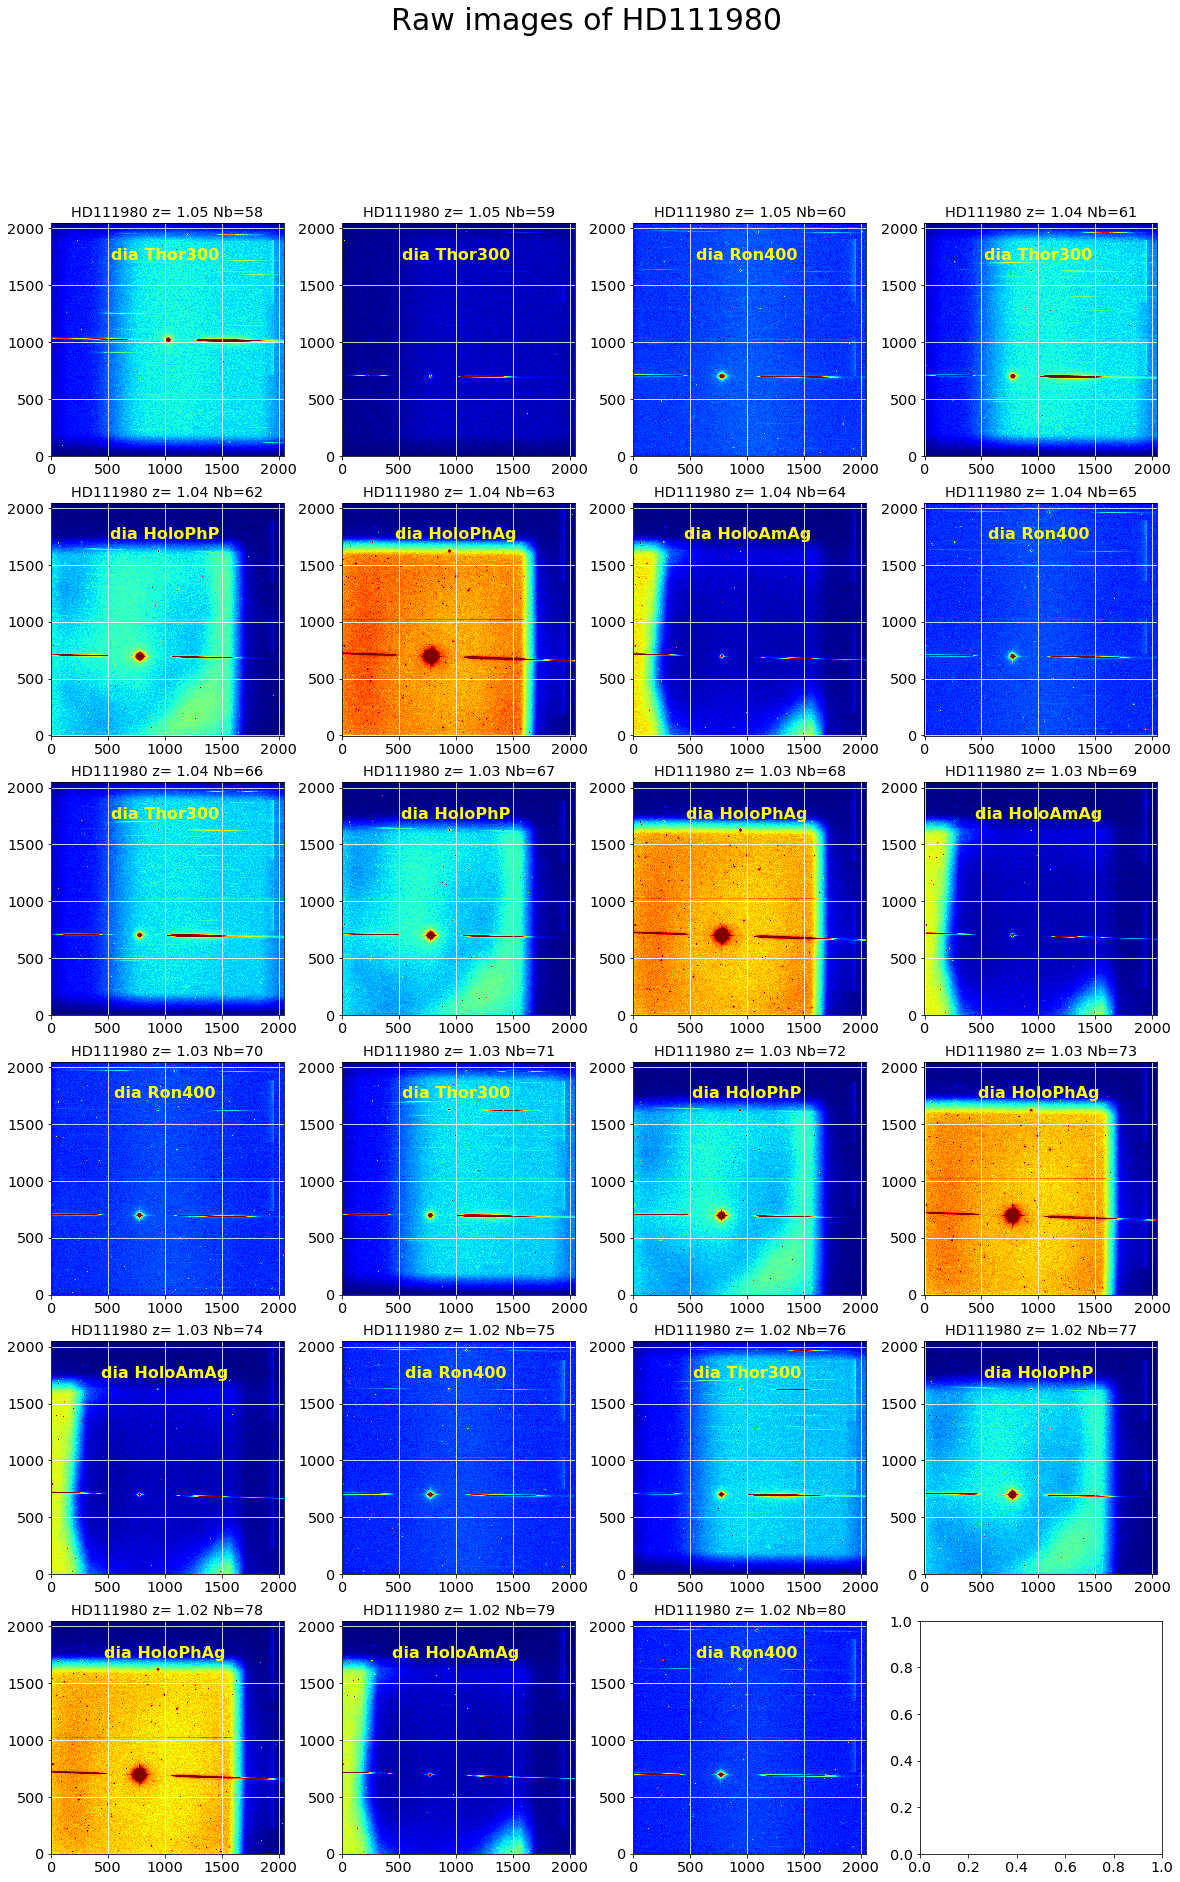

In [26]:
ShowRawImages()

## Show histograms
===========================

In [27]:
def ShowHistograms():
    """
    ShowHistograms
    ==============
    """
    global all_images
    global all_titles
    global object_name


    NBIMAGES=len(all_images)
    MAXIMGROW=int(NBIMAGES/NBIMGPERROW)+1
    
    f, axarr = plt.subplots(MAXIMGROW,NBIMGPERROW,figsize=(20,3*MAXIMGROW))
    for index in np.arange(0,NBIMAGES):
        ix=index%NBIMGPERROW
        iy=index/NBIMGPERROW
        image_flat=all_images[index].flatten()
        stat_mean=image_flat.mean()
        stat_rms=image_flat.std()
        legtitle='mean={:4.2f} std={:4.2f}'.format(stat_mean,stat_rms)
        axarr[iy,ix].hist(image_flat,bins=100,range=(-50,10000),facecolor='blue', alpha=0.75,label=legtitle);
        axarr[iy,ix].set_yscale('log')
        axarr[iy,ix].grid(True)
        axarr[iy,ix].set_ylim(0.,1e10)
        axarr[iy,ix].set_title(all_titles[index])
        axarr[iy,ix].legend(loc='best')  #useless
    title='histograms of images {}  '.format(object_name)
    plt.suptitle(title,size=16)        

/pbs/throng/lsst/users/dagoret/External/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


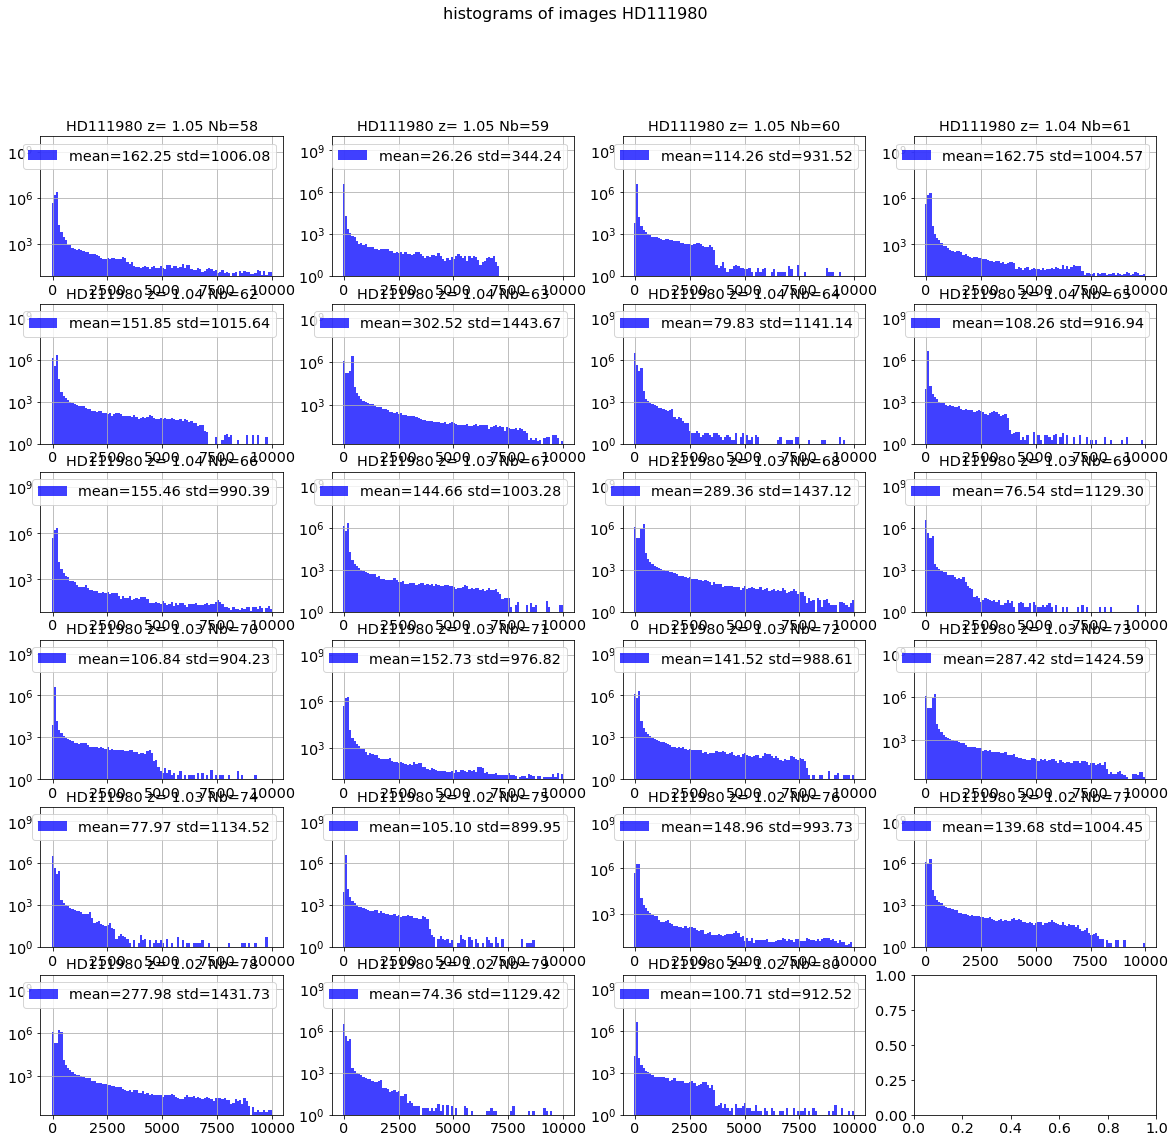

In [28]:
ShowHistograms()

In [29]:
def ShowFewRawImages(NBSEL,indexes_sel):
    """
    ShowRawImages: Show the raw images without background subtraction
    ==============
    """

    
    NBIMAGES=len(all_images)
    NBIMGPERROW=3
    
    MAXIMGROW=int(NBSEL/NBIMGPERROW)+1

    fig, axarr = plt.subplots(MAXIMGROW,NBIMGPERROW,figsize=(25,15))
    index_toplot=0
    for index in np.arange(0,NBIMAGES):
        if index in indexes_sel:
            ix=index_toplot%NBIMGPERROW
            iy=index_toplot/NBIMGPERROW
            #im=axarr[iy,ix].imshow(all_images[index],origin='lower',cmap='rainbow',norm=LogNorm(vmin=0.1, vmax=10))
            im=axarr[iy,ix].imshow(all_images[index],origin='lower',cmap='jet',vmin=0, vmax=500)
            #axarr[iy,ix].annotate(all_filt[index], xy=(1000., 1500.),fontsize=16,color='yellow')
            axarr[iy,ix].text(1000.,1700,all_filt[index],verticalalignment='bottom', horizontalalignment='center',color='yellow', fontweight='bold',fontsize=16)
           
            thetitle="{}:{}".format(index,all_titles[index])
            axarr[iy,ix].set_title(thetitle)
            axarr[iy,ix].grid(color='white', ls='solid')
            axarr[iy,ix].set_xlabel("pixels rows")
            axarr[iy,ix].set_ylabel("pixels columns")
            index_toplot+=1
    title='Reduced images of {}'.format(object_name)  
    #cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    
    axarr[1,2].axis('off') # remove the last frame
    fig.colorbar(im, ax=axarr.ravel().tolist(), shrink=1.0)
    
    plt.suptitle(title,size=30) 
    filename=os.path.join(dir_top_images,'sample_rawimg.pdf')
    plt.savefig(filename)

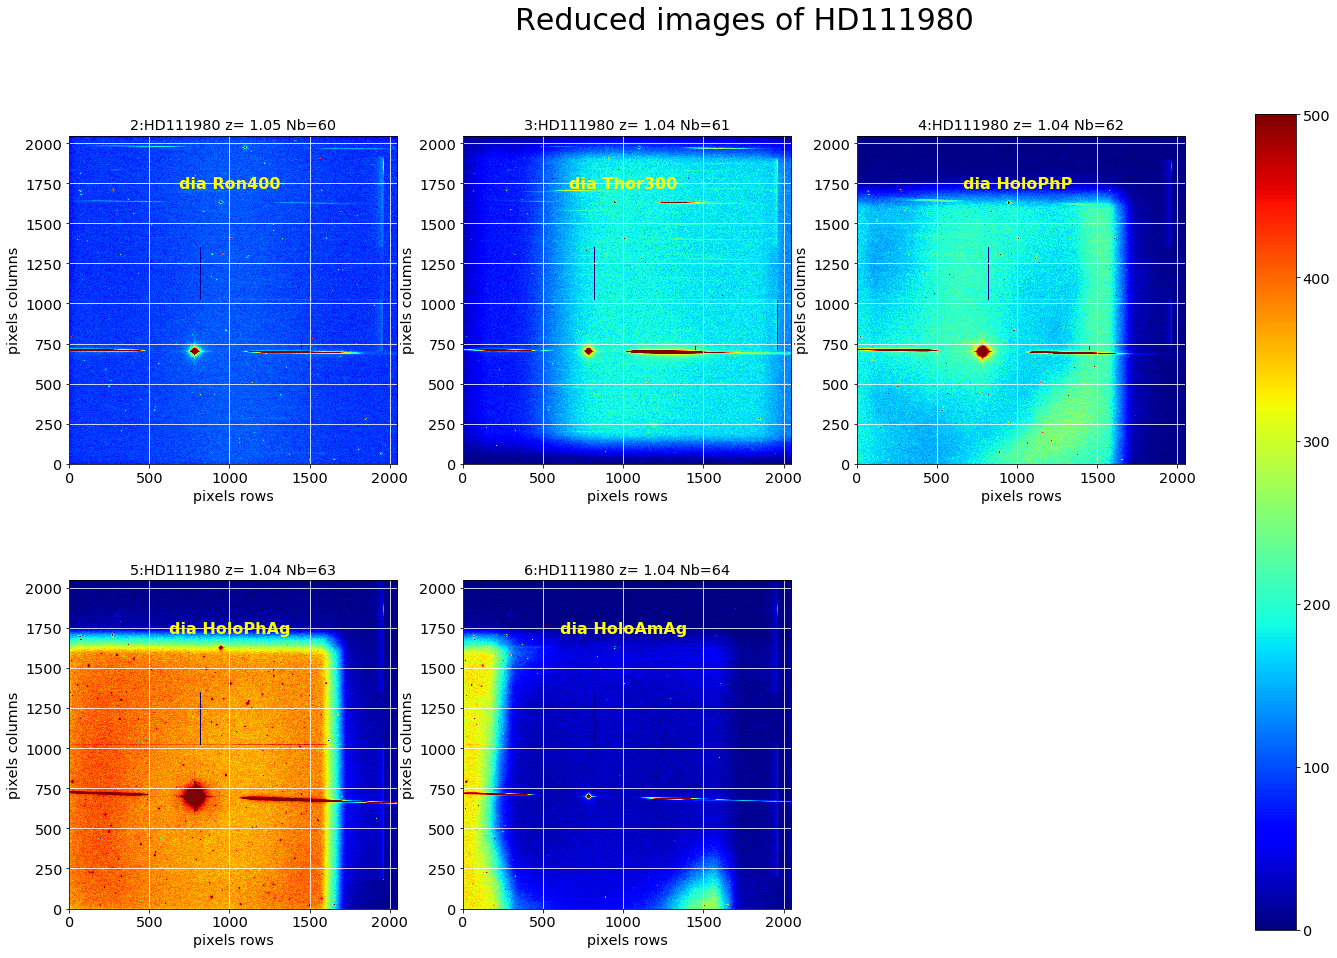

In [30]:
ShowFewRawImages(5,[2,3,4,5,6])